In [72]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [4]:
print(cases.head())
print(deaths.head())

        UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region   
0  84001001   US  USA    840  1001.0  Autauga        Alabama             US  \
1  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
2  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
3  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
4  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_  ... 2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23   
0  32.539527 -86.644082  ...   19732   19759   19759   19759   19759   19759  \
1  30.727750 -87.722071  ...   69641   69767   69767   69767   69767   69767   
2  31.868263 -85.387129  ...    7451    7474    7474    7474    7474    7474   
3  32.996421 -87.125115  ...    8067    8087    8087    8087    8087    8087   
4  33.982109 -86.567906  ...   18616   18673   18673   18673   18673   18673   

   3/6/23  3/7/23  3/8/23  3/9/23  
0   1975

In [5]:
cases_NYC = cases[cases["Province_State"]== "New York"]

In [6]:
cases_NYC_indexed = cases_NYC.set_index("Admin2")
cases_NYC_T = cases_NYC_indexed.T

In [7]:
cases_NYC_indexed

,UID,iso2,iso3,code3,FIPS,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Admin2,,,,,,,,,,,,,,,,,,,,,
Albany,84036001,US,USA,840,36001.0,New York,US,42.600603,-73.977239,"Albany, New York, US",...,79215,79215,79252,79286,79313,79335,79351,79360,79384,79420
Allegany,84036003,US,USA,840,36003.0,New York,US,42.257484,-78.027505,"Allegany, New York, US",...,10855,10855,10858,10865,10875,10883,10888,10891,10897,10902
Bronx,84036005,US,USA,840,36005.0,New York,US,40.852093,-73.862828,"Bronx, New York, US",...,552283,552341,552507,552610,552610,552610,552911,552962,553001,553117
Broome,84036007,US,USA,840,36007.0,New York,US,42.159032,-75.813261,"Broome, New York, US",...,59065,59065,59093,59121,59155,59185,59200,59217,59266,59296
Cattaraugus,84036009,US,USA,840,36009.0,New York,US,42.247782,-78.679231,"Cattaraugus, New York, US",...,19359,19359,19368,19374,19381,19386,19390,19402,19409,19417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington,84036115,US,USA,840,36115.0,New York,US,43.311538,-73.430434,"Washington, New York, US",...,15973,15973,15985,15991,15998,16002,16004,16012,16017,16025
Wayne,84036117,US,USA,840,36117.0,New York,US,43.154944,-77.029765,"Wayne, New York, US",...,22031,22031,22047,22054,22062,22069,22078,22087,22096,22104
Westchester,84036119,US,USA,840,36119.0,New York,US,41.162784,-73.757417,"Westchester, New York, US",...,336263,336263,336332,336391,336455,336497,336526,336574,336628,336689


In [8]:
cases_NYC_T

Admin2,Albany,Allegany,Bronx,Broome,Cattaraugus,Cayuga,Chautauqua,Chemung,Chenango,Clinton,...,Tioga,Tompkins,Ulster,Unassigned,Warren,Washington,Wayne,Westchester,Wyoming,Yates
UID,84036001,84036003,84036005,84036007,84036009,84036011,84036013,84036015,84036017,84036019,...,84036107,84036109,84036111,84090036,84036113,84036115,84036117,84036119,84036121,84036123
iso2,US,US,US,US,US,US,US,US,US,US,...,US,US,US,US,US,US,US,US,US,US
iso3,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,...,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
code3,840,840,840,840,840,840,840,840,840,840,...,840,840,840,840,840,840,840,840,840,840
FIPS,36001.0,36003.0,36005.0,36007.0,36009.0,36011.0,36013.0,36015.0,36017.0,36019.0,...,36107.0,36109.0,36111.0,90036.0,36113.0,36115.0,36117.0,36119.0,36121.0,36123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/5/23,79335,10883,552610,59185,19386,20626,29694,26823,11895,22908,...,14170,26840,43514,986,19065,16002,22069,336497,10001,4469
3/6/23,79351,10888,552911,59200,19390,20630,29699,26827,11901,22916,...,14172,26845,43522,984,19072,16004,22078,336526,10003,4469
3/7/23,79360,10891,552962,59217,19402,20637,29713,26830,11902,22922,...,14175,26855,43541,984,19078,16012,22087,336574,10007,4469
3/8/23,79384,10897,553001,59266,19409,20646,29721,26839,11904,22935,...,14185,26864,43550,984,19081,16017,22096,336628,10013,4470


In [9]:
cases_clean = cases_NYC_T.drop(['UID','iso2','iso3','code3','FIPS','Province_State','Country_Region','Lat','Long_','Combined_Key'])

In [10]:
deaths_clean = deaths[deaths["Province_State"] == "New York"].set_index("Admin2").T.drop(['UID','iso2','iso3','code3','FIPS','Province_State','Country_Region','Lat','Long_','Combined_Key']).drop("Population",axis=0)

In [11]:
counties = ['Kings','Queens','New York','Suffolk']

Text(0.5, 1.0, 'Covid-19 cases in New York Counties')

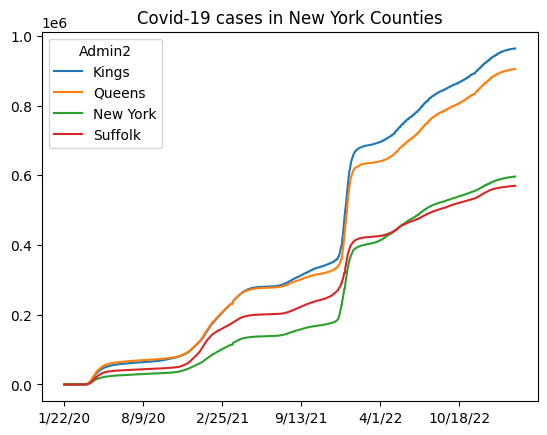

In [12]:
plot = cases_clean[counties].plot()
plot.set_title("Covid-19 cases in New York Counties")

Text(0.5, 1.0, 'Covid-19 cases in New York Counties')

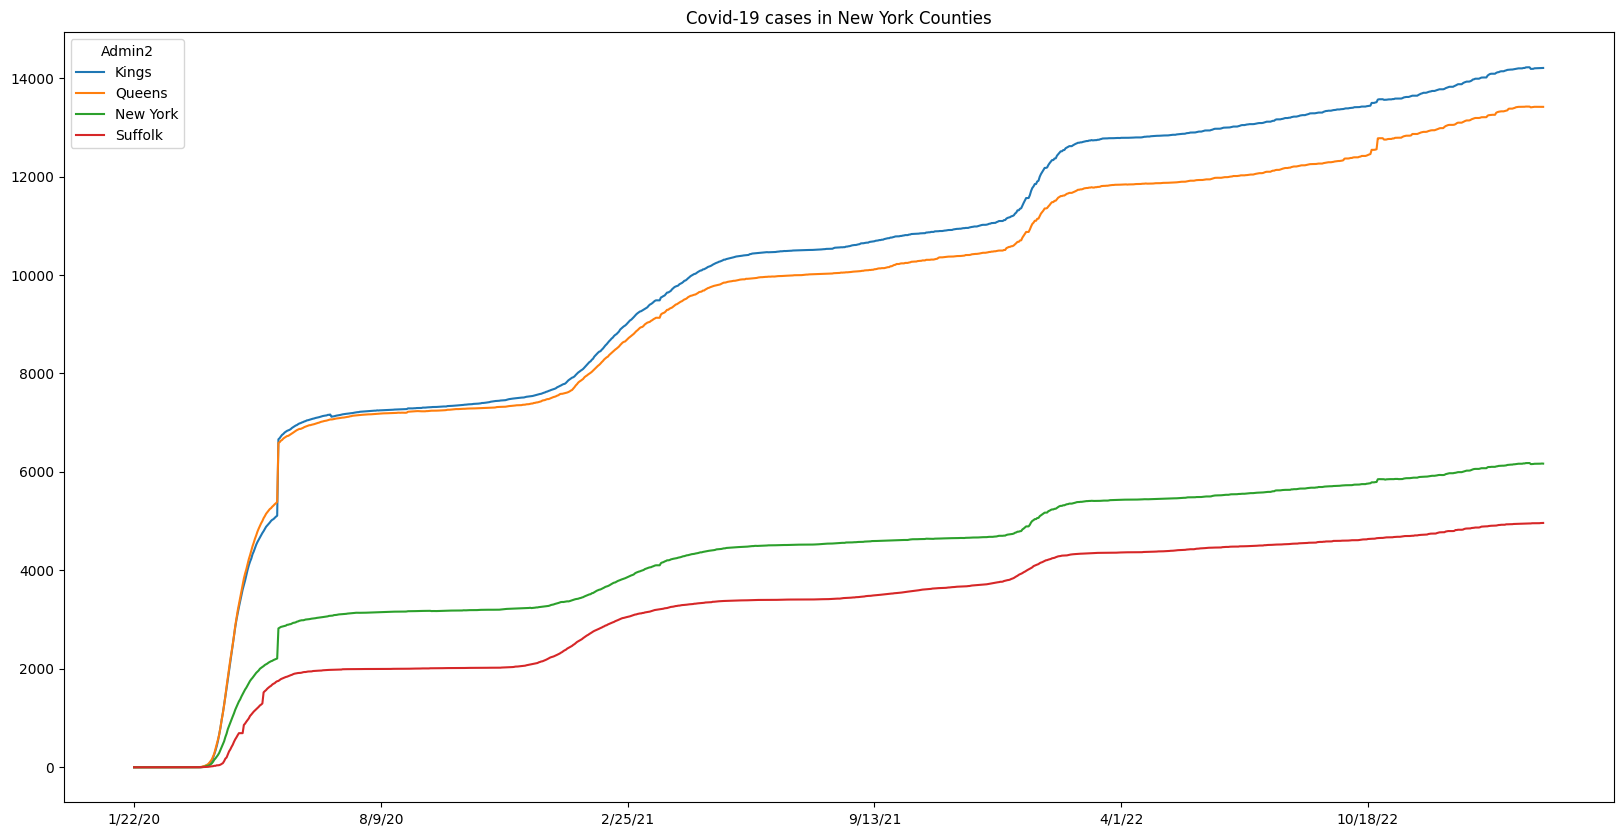

In [13]:
plot = deaths_clean[counties].plot(figsize=(20,10))
plot.set_title("Covid-19 cases in New York Counties")

In [14]:
cases_diff = cases_clean.diff().rolling(window=7).mean()
deaths_diff = deaths_clean.diff().rolling(window=7).mean()

In [44]:
pop = pd.read_csv(r'C:\New folder\a Tech\NTI\BIG DATA\Python\6-Day-05-10\covid_county_population_usafacts.csv')

In [45]:
pop["County Name"] = pop["County Name"].str.replace(" County","")

In [46]:
pop = pop[pop['State'] == 'NY']

In [47]:
pop

,countyFIPS,County Name,State,population
1860,36001,Albany,NY,305506
1861,36003,Allegany,NY,46091
1862,36005,Bronx,NY,1418207
1863,36007,Broome,NY,190488
1864,36009,Cattaraugus,NY,76117
...,...,...,...,...
1917,36115,Washington,NY,61204
1918,36117,Wayne,NY,89918
1919,36119,Westchester,NY,967506
1920,36121,Wyoming,NY,39859


In [48]:
pop2 = pop.drop(['countyFIPS', 'State'], axis=1).set_index('County Name')


In [49]:
pop2

,population
County Name,
Albany,305506
Allegany,46091
Bronx,1418207
Broome,190488
Cattaraugus,76117
...,...
Washington,61204
Wayne,89918
Westchester,967506


In [50]:
cases_pm = cases_clean.copy()
for c in pop2.index.tolist():
    cases_pm[c] = cases_pm[c]/pop2.loc[c , :]['population']
cases_pm = cases_pm*1000000

deaths_pm = deaths_clean.copy()
for c in pop2.index.tolist():
    deaths_pm[c] = deaths_pm[c]/pop2.loc[c , :]['population']
deaths_pm = deaths_pm*1000000


In [52]:
cases_pm_diff = cases_pm.diff().rolling(window=7).mean()
deaths_pm_diff = deaths_pm.diff().rolling(window=7).mean()

Text(0.5, 1.0, '7 day moving avg of new COVID-19 cases')

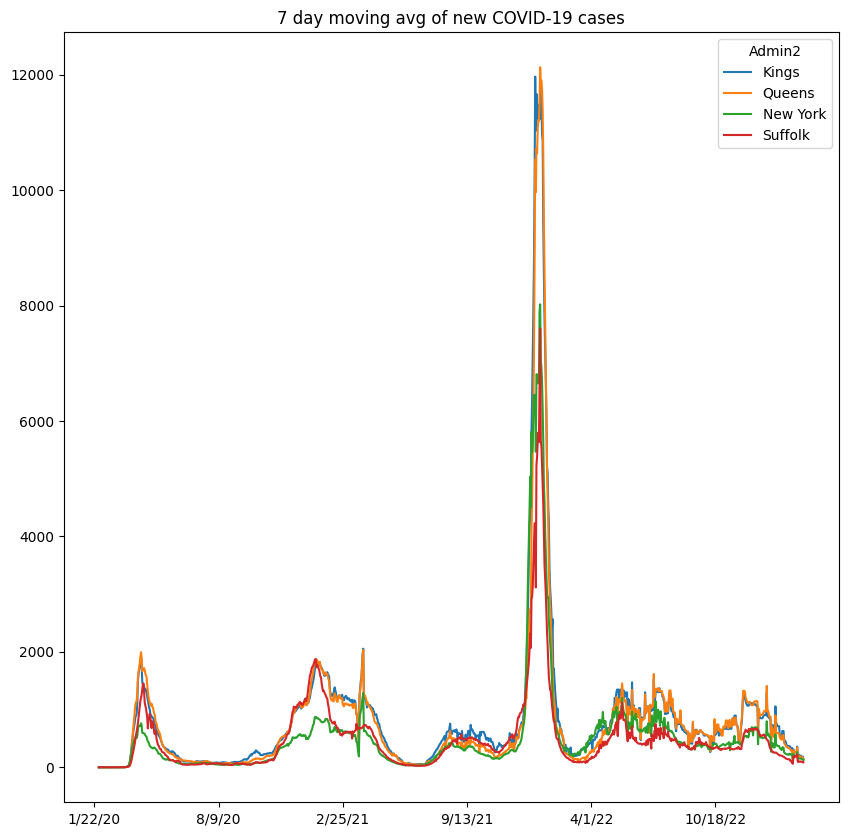

In [57]:
plot = cases_diff[counties].plot(figsize=(10,10))
plot.set_title("7 day moving avg of new COVID-19 cases")

Text(0.5, 1.0, '7 day moving avg of new COVID-19 cases')

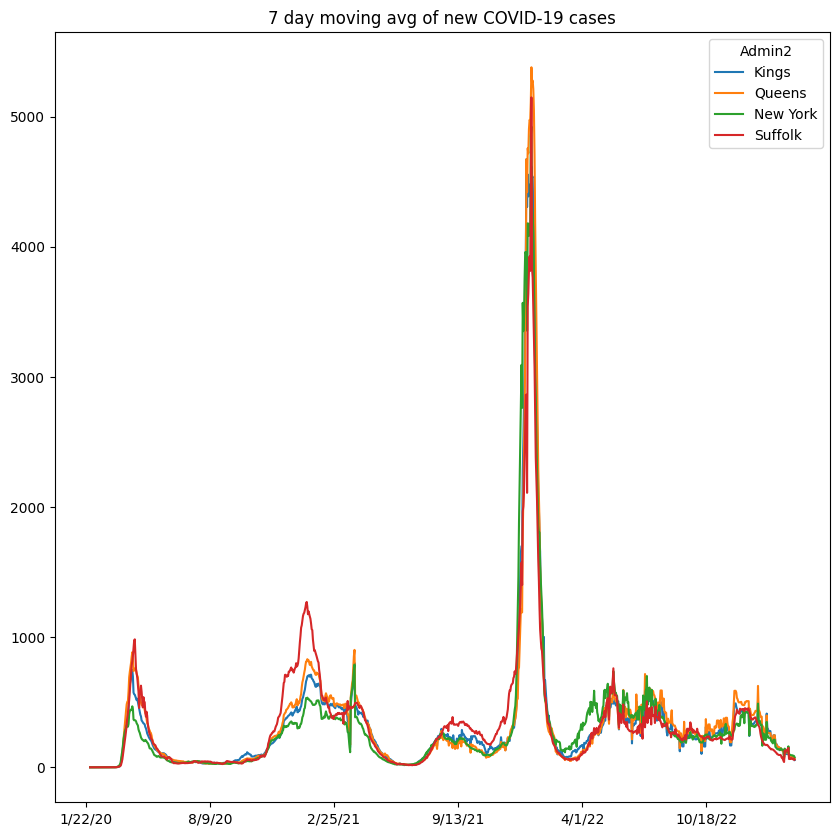

In [58]:
plot = cases_pm_diff[counties].plot(figsize=(10,10))
plot.set_title("7 day moving avg of new COVID-19 cases")

Text(0.5, 1.0, 'Top 10 counties by COVID-19 cases per million inhabitants')

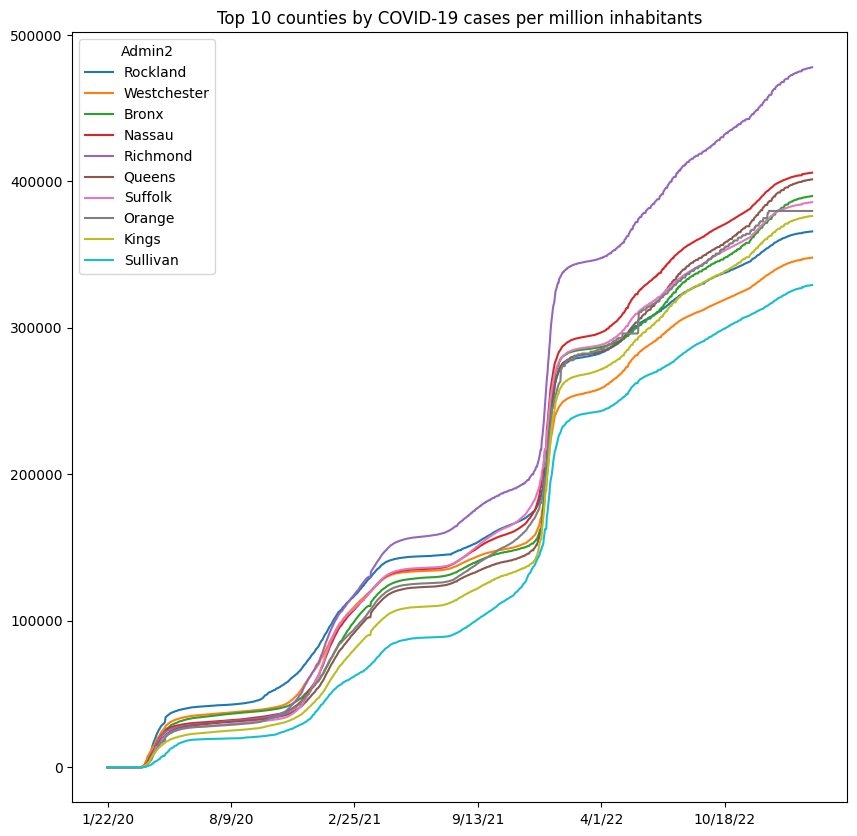

In [62]:
plot = cases_pm.sort_values(axis=1, by='7/20/20', ascending=False).iloc[:, : 10].plot(figsize=(10,10))
plot.set_title("Top 10 counties by COVID-19 cases per million inhabitants")

# The Graph Below has an issue in the Y-axis

Text(0.5, 1.0, 'Top 10 counties by COVID-19 deaths per million inhabitants')

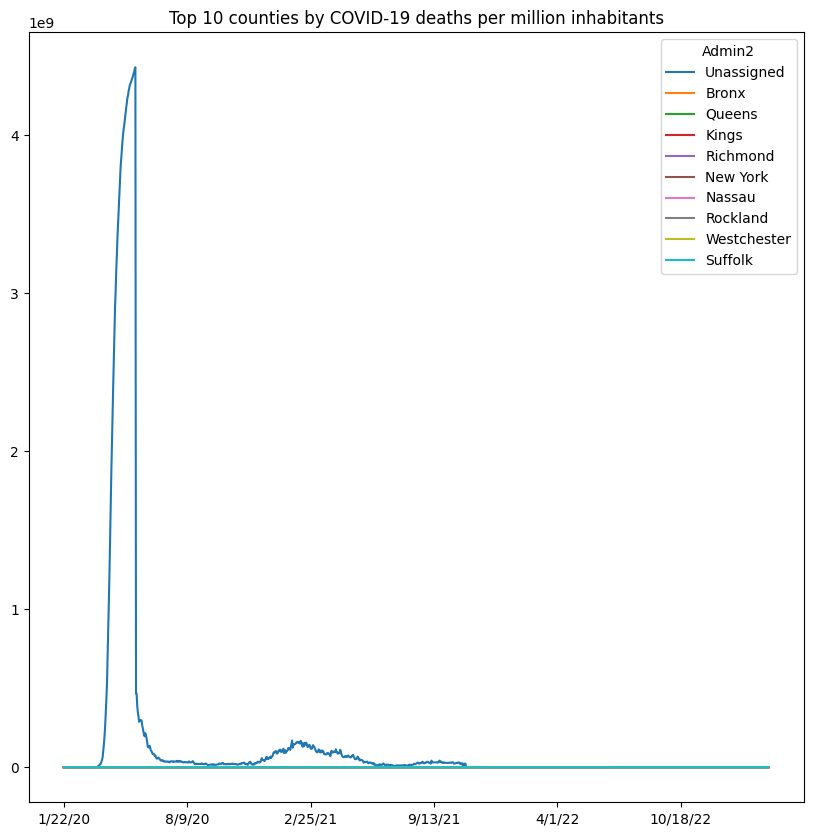

In [70]:
plot = deaths_pm.sort_values(axis=1, by='7/20/20', ascending=False).iloc[:, : 10].plot(figsize=(10,10))
plot.set_title("Top 10 counties by COVID-19 deaths per million inhabitants")

# The Graph Below has an issue in the Y-axis

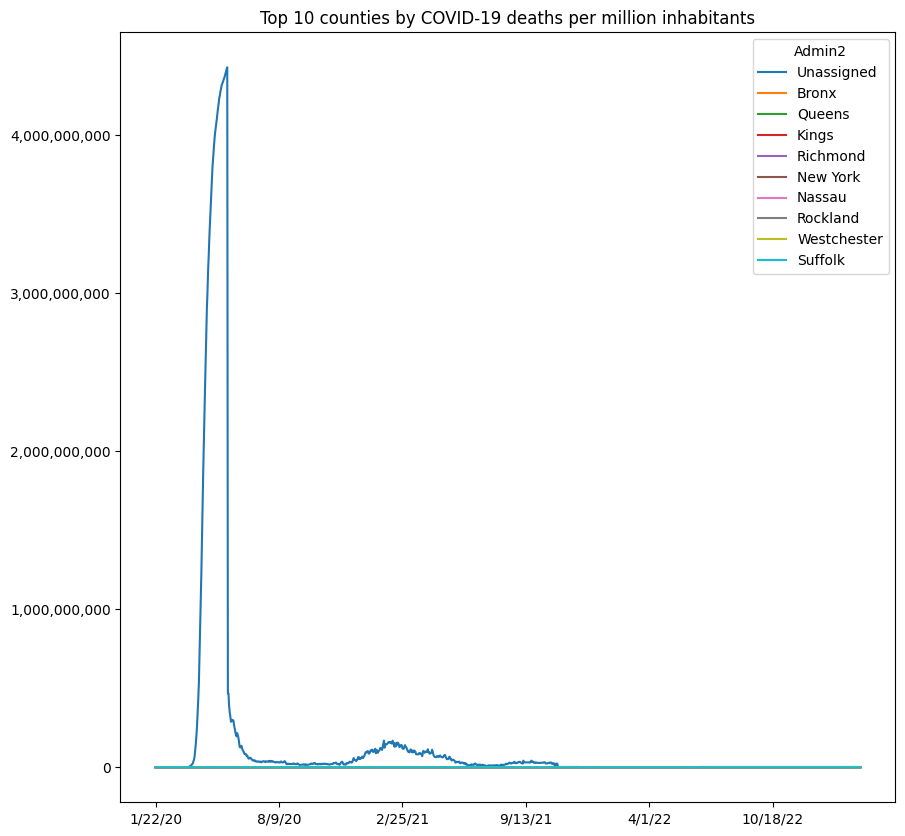

In [74]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plot = deaths_pm.sort_values(axis=1, by='7/20/20', ascending=False).iloc[:, : 10].plot(figsize=(10,10))
plot.set_title("Top 10 counties by COVID-19 deaths per million inhabitants")

# Get the y-axis object
y_axis = plot.axes.get_yaxis()

# Set the y-axis tick formatter to display numbers without scientific notation
y_axis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Show the plot
plt.show()


Text(0.5, 1.0, 'Top 10 counties by COVID-19 cases per million inhabitants')

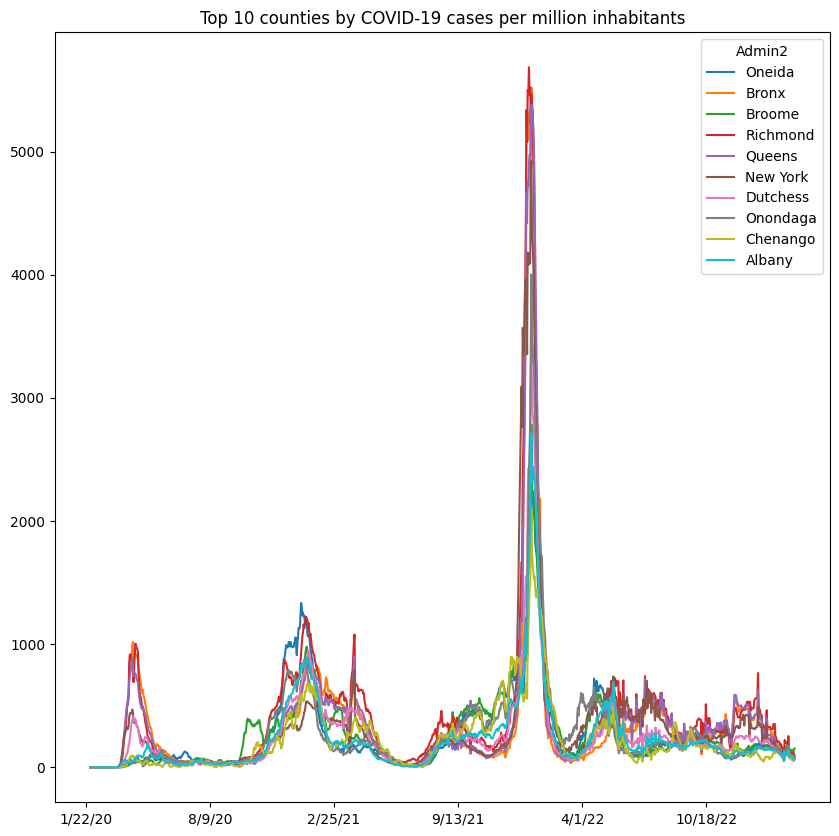

In [77]:
plot = cases_pm_diff.sort_values(axis=1, by='7/20/20', ascending=False).iloc[:, : 10].plot(figsize=(10,10))
plot.set_title("Top 10 counties by COVID-19 cases per million inhabitants")

Text(0.5, 1.0, 'Top 10 counties by COVID-19 deaths per million inhabitants')

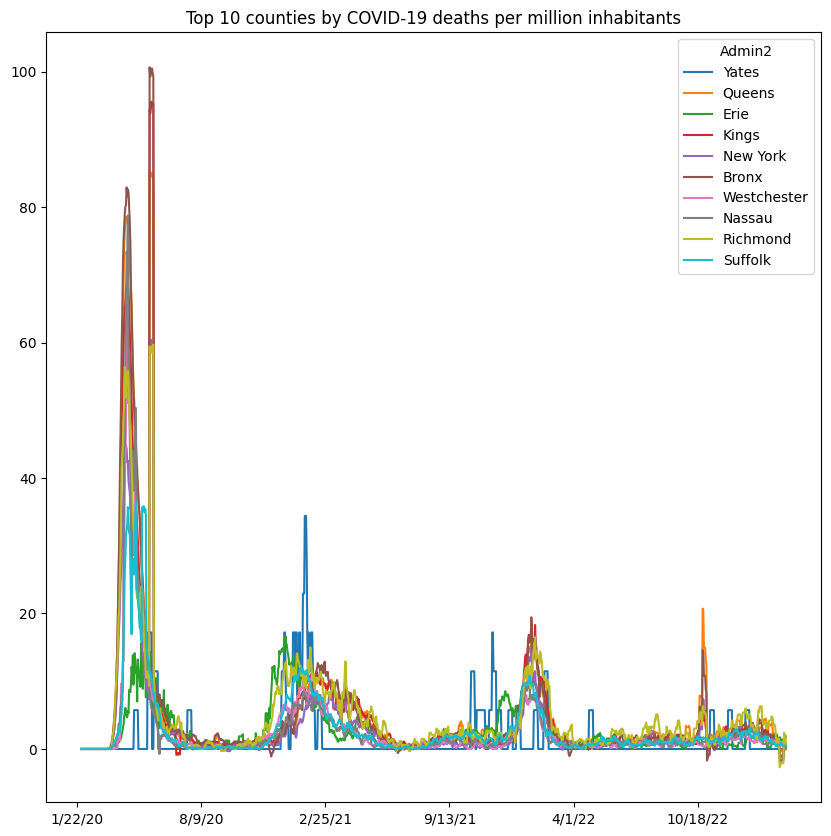

In [78]:
plot = deaths_pm_diff.sort_values(axis=1, by='7/20/20', ascending=False).iloc[:, : 10].plot(figsize=(10,10))
plot.set_title("Top 10 counties by COVID-19 deaths per million inhabitants")